In [71]:
#Let's import necessary dependencies 
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline 

In [73]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 1000)
data=pd.read_csv('covtype.csv')

In [78]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [79]:
print('Skewness of the below features:')
print(data.skew())

Skewness of the below features:
Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                           

<Figure size 432x288 with 0 Axes>

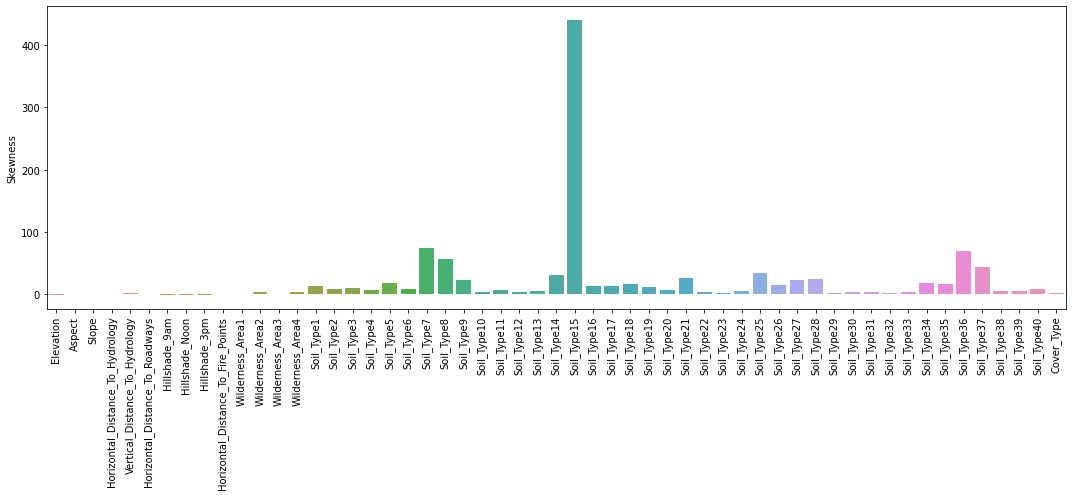

In [80]:
skew=data.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.tight_layout()
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Skewness.png', dpi=1000)

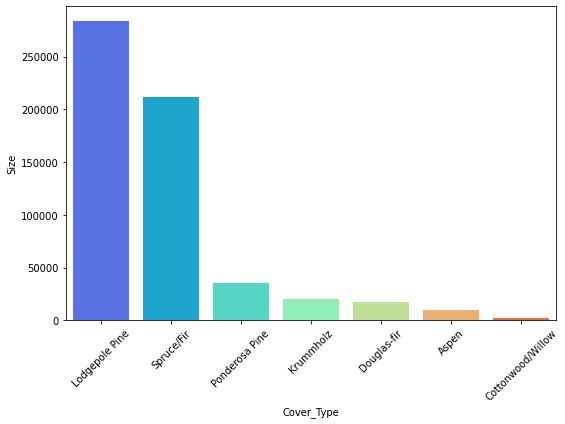

In [105]:

newData = data
labels = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'
}
for label in labels.keys():
    newData['Cover_Type'] = newData['Cover_Type'].replace(label, labels[label])


class_dist=data.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist.sort_values(ascending=False),columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index,y='Size',data=class_label, palette='rainbow')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Distribution.png', dpi=1000)

In [83]:
for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    print('Cover_Type',class_dist.index[i])
    print('%.2f'% percent,'%')

Cover_Type Aspen
1.63 %
Cover_Type Cottonwood/Willow
0.47 %
Cover_Type Douglas-fir
2.99 %
Cover_Type Krummholz
3.53 %
Cover_Type Lodgepole Pine
48.76 %
Cover_Type Ponderosa Pine
6.15 %
Cover_Type Spruce/Fir
36.46 %


In [85]:
cont_data=data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
binary_data=data.loc[:,'Wilderness_Area1':'Soil_Type40']
Wilderness_data=data.loc[:,'Wilderness_Area1': 'Wilderness_Area4']
Soil_data=data.loc[:,'Soil_Type1':'Soil_Type40']

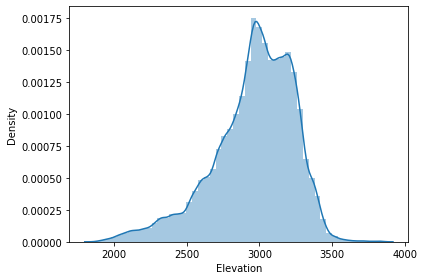

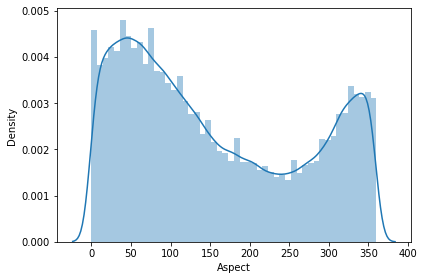

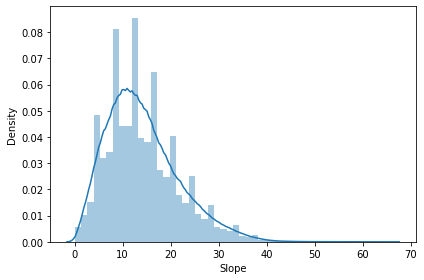

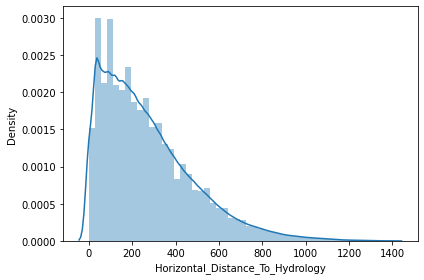

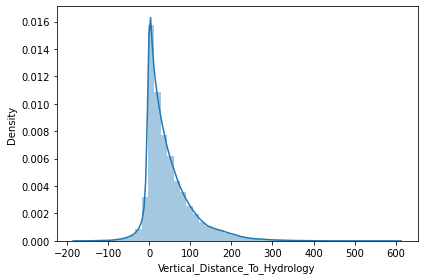

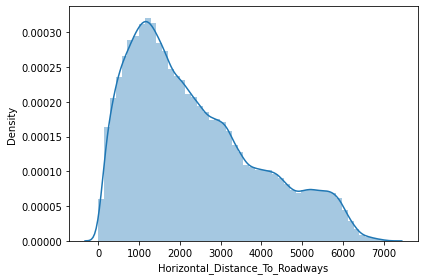

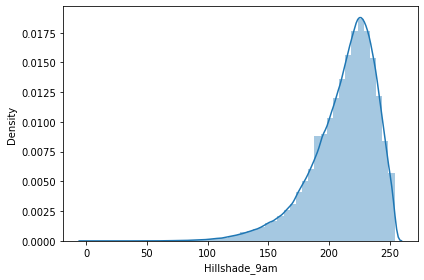

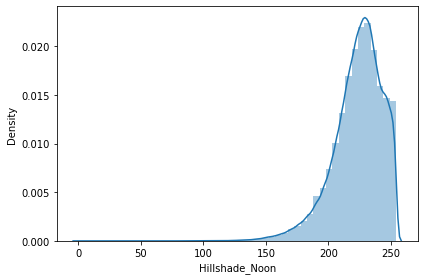

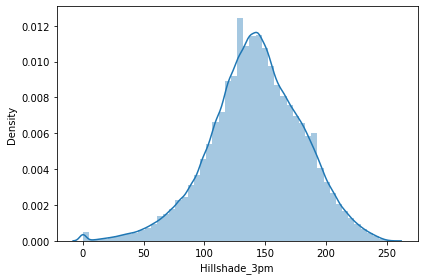

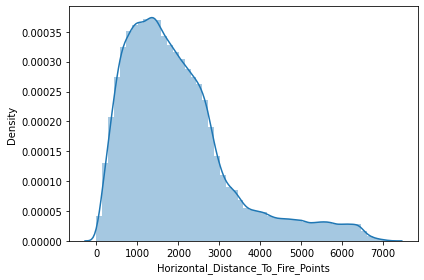

In [119]:
for i, col in enumerate(cont_data.columns):
    plt.savefig('{}.png'.format(i), dpi=500)
    plt.figure(i)
    sns.distplot(cont_data[col])
    plt.tight_layout()
    plt.savefig('{}.png'.format(i), dpi=500)

In [88]:
%%time
def rev_code(row):
    for c in Wilderness_data.columns:
        if row[c]==1:
            return c  

data['Wilderness_Type']=Wilderness_data.apply(rev_code, axis=1) #Time consuming

Wall time: 14 s


Wall time: 1.21 s


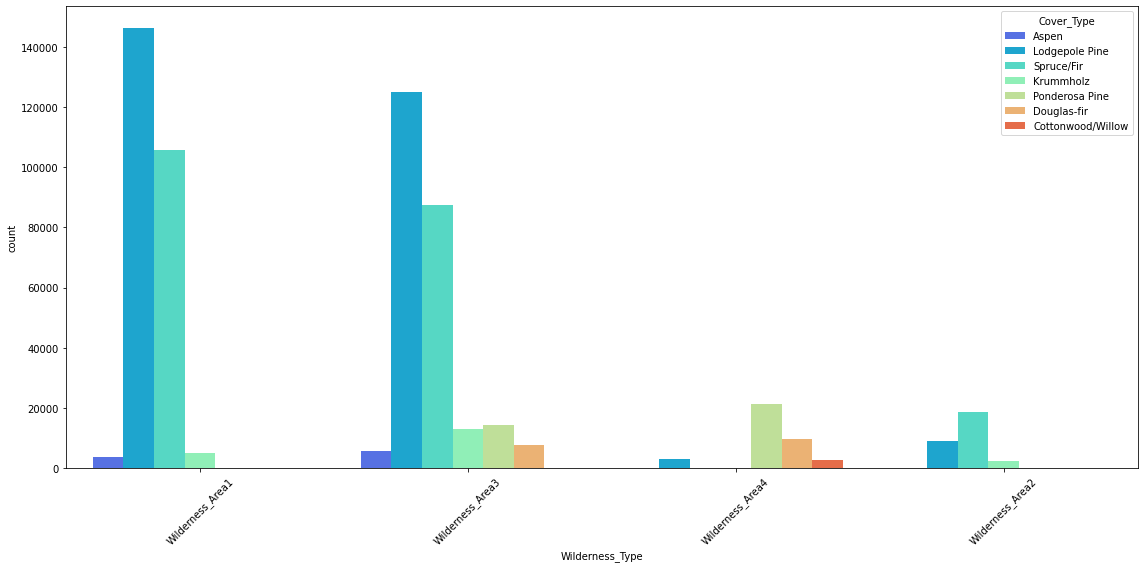

In [108]:
%%time
plt.figure(figsize=(16,8))
g = sns.countplot(x='Wilderness_Type', hue='Cover_Type',data=newData, palette="rainbow")
g.figure.get_axes()[0].legend(title="Cover_Type", loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('wilderness_distribution.png', dpi=300)

In [110]:
%%time
def rev_code(row):
    for c in Soil_data.columns:
        if row[c]==1:
            return c  

data['Soil_Type']=Soil_data.apply(rev_code, axis=1) #Time consuming

Wall time: 2min 12s


Wall time: 2.1 s


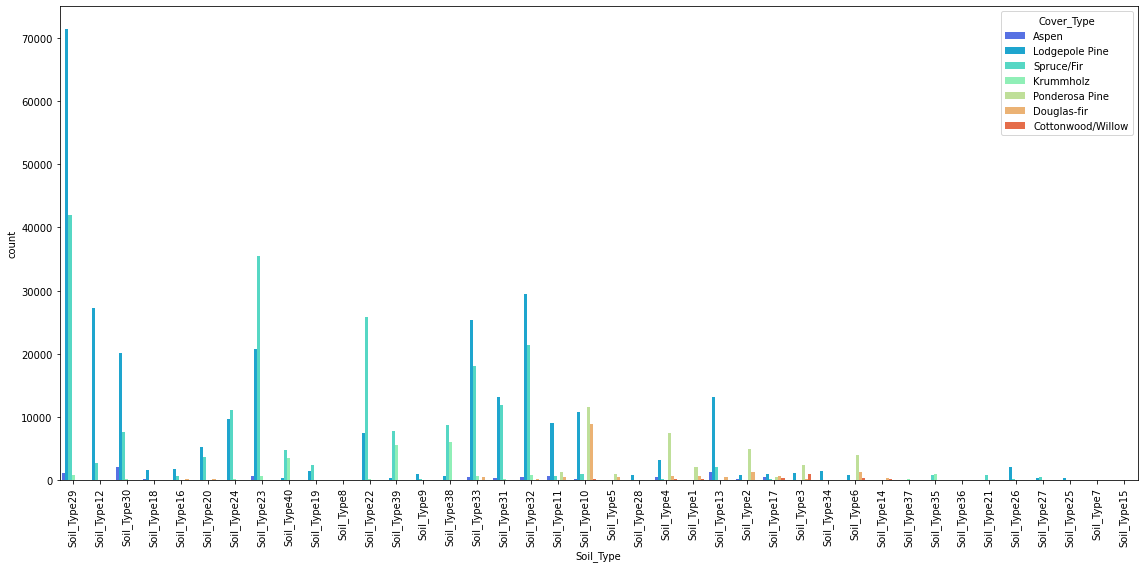

In [113]:
%%time
plt.figure(figsize=(16,8))
g = sns.countplot(x='Soil_Type', hue='Cover_Type',data=newData, palette="rainbow")
g.figure.get_axes()[0].legend(title="Cover_Type", loc="upper right")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Soil distribution.png', dpi=300)

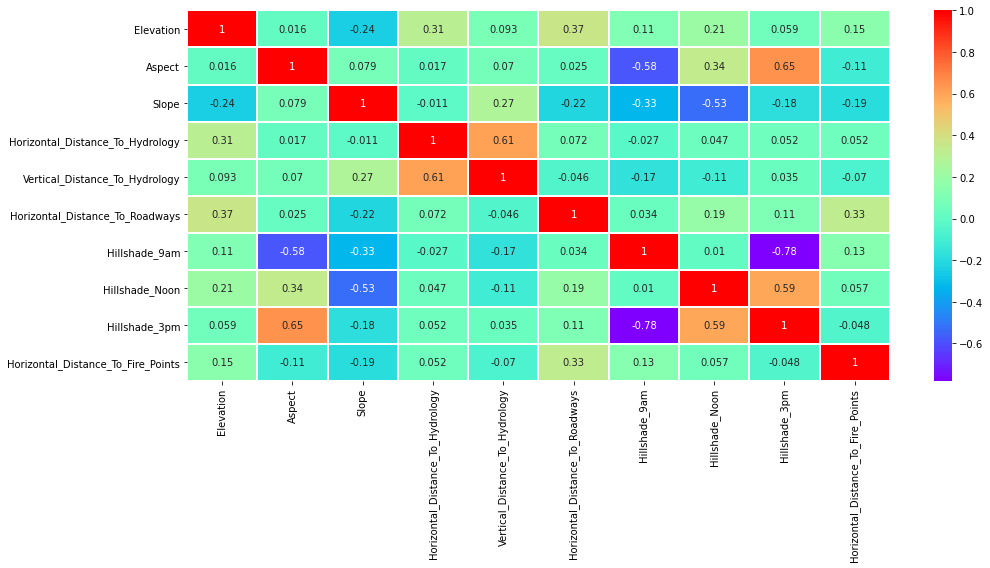

In [116]:
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(),cmap='rainbow',linecolor='white',linewidths=1,annot=True)
plt.tight_layout()
plt.savefig('Correlation.png', dpi=300)